### 생선 분류
- 데이터셋 : fish.csv
- 피쳐/특성 : Weight, Length
- 타겟/라벨 : Species
- 학습방법 : 지도학습 => 분류
- 학습알고리즘 : 최근접이웃알고리즘

[1] 데이터 준비

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
DATA_FILE='../data/fish.csv'

In [4]:
# 행 : Bream, Smelt / 컬럼 : Species, Weight, Length => 0, 1, 2
fishDF=pd.read_csv(DATA_FILE, usecols=[0,1,2])
fishDF.head(3)

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5


In [5]:
mask=(fishDF['Species']=='Bream') | (fishDF['Species']=='Smelt')
twoDF=fishDF[mask]
twoDF.reset_index(drop=True, inplace=True)
twoDF.index

RangeIndex(start=0, stop=49, step=1)

In [6]:
# Species 컬럼을 수치화 => Bream 0, Smelt 1
new_cols=twoDF.loc[:, 'Species'].replace({'Bream':0,'Smelt':1})
twoDF['FCode']=new_cols

C:\Users\LG\AppData\Local\Temp\ipykernel_37024\1456489529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoDF['FCode']=new_cols


[2] 피쳐와 타겟 분리

In [7]:
features=twoDF[['Weight','Length']]
target=twoDF['FCode']

print(f'features => {features.shape}, {features.ndim}D')
print(f'target => {target.shape}, {target.ndim}D')

features => (49, 2), 2D
target => (49,), 1D


[3] 데이터셋 준비 => 학습용, 테스트용

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# train:test = 80:20 => test_size=0.2 또는 train_size=0.8
# stratify 매개변수 : 분류일 경우 사용, 분류 타겟의 종류에 대한 비율을 고려
X_train, X_test, y_train, y_test=train_test_split(features, 
                                                  target,
                                                  test_size=0.2,
                                                  stratify=target,
                                                  random_state=10)

In [10]:
print(f'X_train : {X_train.shape},{X_train.ndim}D')
print(f'y_train : {y_train.shape},{y_train.ndim}D')

print(f'X_test : {X_test.shape},{X_test.ndim}D')
print(f'y_test : {y_test.shape},{y_test.ndim}D')

X_train : (39, 2),2D
y_train : (39,),1D
X_test : (10, 2),2D
y_test : (10,),1D


In [11]:
# target 0(Bream), 1(Smelt)의 비율
y_train.value_counts()[0]/y_train.shape[0] , y_train.value_counts()[1]/y_train.shape[0]

(0.717948717948718, 0.28205128205128205)

In [12]:
y_test.value_counts()[0]/y_test.shape[0] , y_test.value_counts()[1]/y_test.shape[0]

(0.7, 0.3)

[4] 훈련/학습 진행
- 학습 알고리즘 인스턴스 생성
- 학습진행 => fit()

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# 인스턴스 생성
model=KNeighborsClassifier()

In [15]:
# 학습 진행 => 학습용 데이터셋 사용
model.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
# 학습 후 모델 파라미터 확인
model.classes_ , model.feature_names_in_, model.n_samples_fit_

(array([0, 1], dtype=int64), array(['Weight', 'Length'], dtype=object), 39)

[5] 모델 성능평가 => score() 메서드 + 테스트 데이터셋

In [17]:
model.score(X_test, y_test)

1.0

[6] 예측 하기 => 학습/훈련과 테스트에 사용되지 않은 데이터 사용
- 주의 : 입력 데이터 => 2D

In [18]:
new_data=pd.DataFrame([[413,27.8]],columns=model.feature_names_in_)

In [19]:
model.predict(new_data)

array([0], dtype=int64)

In [20]:
# 최근접한 k개 데이터 찾기
distance, index=model.kneighbors(new_data)

In [21]:
distance

array([[17.04230031, 23.10497782, 37.04875167, 37.0653477 , 50.01439793]])

In [22]:
# 2D를 1D로, array를 list로
neighbors=index.reshape(-1).tolist()

In [23]:
twoDF.iloc[neighbors]['Weight'], twoDF.iloc[neighbors]['Length']

(25    725.0
 0     242.0
 21    685.0
 6     500.0
 22    620.0
 Name: Weight, dtype: float64,
 25    35.0
 0     25.4
 21    34.0
 6     29.7
 22    34.5
 Name: Length, dtype: float64)

In [24]:
twoDF.loc[neighbors]

,Species,Weight,Length,FCode
25,Bream,725.0,35.0,0
0,Bream,242.0,25.4,0
21,Bream,685.0,34.0,0
6,Bream,500.0,29.7,0
22,Bream,620.0,34.5,0


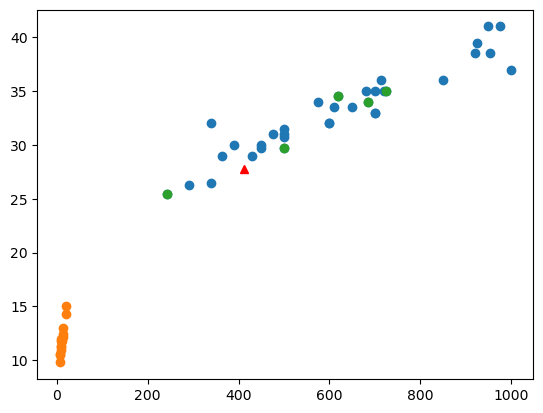

In [25]:
# 시각화로 확인
plt.scatter(twoDF.loc[:34,'Weight'],twoDF.loc[:34,'Length'])
plt.scatter(twoDF.loc[35:,'Weight'],twoDF.loc[35:,'Length'])
plt.plot(new_data['Weight'],new_data['Length'],'r^')
plt.scatter(twoDF.iloc[neighbors]['Weight'], twoDF.iloc[neighbors]['Length'])
plt.show()